# 采集数据

## 1. 导入包

In [14]:
import numpy as np 
import os
import dlib
import cv2
from scipy.spatial import distance
from imutils import face_utils
import pickle

## 2. 队列

In [15]:
VECTOR_SIZE = 3
def queue_in(queue, data):
    ret = None
    if len(queue) >= VECTOR_SIZE:
        ret = queue.pop(0)
    queue.append(data)
    return ret, queue

## 3. 采集数据前准备

In [60]:
def eye_aspect_ratio(eye):
    # print(eye)
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

pwd = os.getcwd()
model_path = os.path.join(pwd, 'model')
shape_detector_path = os.path.join(model_path, 'shape_predictor_68_face_landmarks.dat')

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_detector_path)

cv2.namedWindow("frame", cv2.WINDOW_AUTOSIZE)

cap = cv2.VideoCapture(0)

# 对应特征点的序号
RIGHT_EYE_START = 37 - 1
RIGHT_EYE_END = 42 - 1
LEFT_EYE_START = 43 - 1
LEFT_EYE_END = 48 - 1

## 4. 采集眼睛睁开时的样本

In [52]:
print('Prepare to collect images with your eyes open')
print('Press s to start collecting images.')
print('Press e to end collecting images.')
print('Press q to quit')
flag = 0
txt = open('train_open.txt', 'w')
data_counter = 0
ear_vector = []
while(1):
    ret, frame = cap.read()
    key = cv2.waitKey(1)
    if key & 0xFF == ord("s"):
        print('Start collecting images.')
        flag = 1
    elif key & 0xFF == ord("e"):
        print('Stop collecting images.')
        flag = 0
    elif key & 0xFF == ord("q"):
        print('quit')
        break

    if flag == 1:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)
        for rect in rects:
            shape = predictor(gray, rect)
            points = face_utils.shape_to_np(shape)# convert the facial landmark (x, y)-coordinates to a NumPy array
            # points = shape.parts()
            leftEye = points[LEFT_EYE_START:LEFT_EYE_END + 1]
            rightEye = points[RIGHT_EYE_START:RIGHT_EYE_END + 1]
            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)
            # print('leftEAR = {0}'.format(leftEAR))
            # print('rightEAR = {0}'.format(rightEAR))

            ear = (leftEAR + rightEAR) / 2.0

            leftEyeHull = cv2.convexHull(leftEye)
            rightEyeHull = cv2.convexHull(rightEye)
            cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
            cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

            ret, ear_vector = queue_in(ear_vector, ear)
            if(len(ear_vector) == VECTOR_SIZE):
                # print(ear_vector)
                # input_vector = []
                # input_vector.append(ear_vector)

                txt.write(str(ear_vector))
                txt.write('\n')
                data_counter += 1
                print(data_counter)

            cv2.putText(frame, "EAR:{:.2f}".format(ear), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    cv2.imshow("frame", frame)
txt.close()

Prepare to collect images with your eyes open
Press s to start collecting images.
Press e to end collecting images.
Press q to quit
Start collecting images.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238

## 5. 采集眼睛闭合时的样本

In [61]:
print('-'*40)
print('Prepare to collect images with your eyes close')
print('Press s to start collecting images.')
print('Press e to end collecting images.')
print('Press q to quit')
flag = 0
txt = open('train_close.txt', 'w')
data_counter = 0
ear_vector = []
while(1):
    ret, frame = cap.read()
    key = cv2.waitKey(1)
    if key & 0xFF == ord("s"):
        print('Start collecting images.')
        flag = 1
    elif key & 0xFF == ord("e"):
        print('Stop collecting images.')
        flag = 0
    elif key & 0xFF == ord("q"):
        print('quit')
        break

    if flag == 1:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        rects = detector(gray, 0)
        for rect in rects:
            shape = predictor(gray, rect)
            points = face_utils.shape_to_np(shape)# convert the facial landmark (x, y)-coordinates to a NumPy array
            # points = shape.parts()
            leftEye = points[LEFT_EYE_START:LEFT_EYE_END + 1]
            rightEye = points[RIGHT_EYE_START:RIGHT_EYE_END + 1]
            leftEAR = eye_aspect_ratio(leftEye)
            rightEAR = eye_aspect_ratio(rightEye)
            # print('leftEAR = {0}'.format(leftEAR))
            # print('rightEAR = {0}'.format(rightEAR))

            ear = (leftEAR + rightEAR) / 2.0

            leftEyeHull = cv2.convexHull(leftEye)
            rightEyeHull = cv2.convexHull(rightEye)
            cv2.drawContours(frame, [leftEyeHull], -1, (0, 255, 0), 1)
            cv2.drawContours(frame, [rightEyeHull], -1, (0, 255, 0), 1)

            ret, ear_vector = queue_in(ear_vector, ear)
            if(len(ear_vector) == VECTOR_SIZE):
                # print(ear_vector)
                # input_vector = []
                # input_vector.append(ear_vector)

                txt.write(str(ear_vector))
                txt.write('\n')

                data_counter += 1
                print(data_counter)

            cv2.putText(frame, "EAR:{:.2f}".format(ear), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

    cv2.imshow("frame", frame)
txt.close()

----------------------------------------
Prepare to collect images with your eyes close
Press s to start collecting images.
Press e to end collecting images.
Press q to quit
Start collecting images.
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
2

In [62]:
cap.release()
cv2.destroyAllWindows()

# 训练SVM

## 1. 导入包

In [55]:
import numpy as np 
from sklearn import svm
from sklearn.externals import joblib

## 2. 解析数据

In [63]:
train = []
labels = []

print('Reading train_open.txt...')
train_open_txt = open('train_open.txt', 'r')
line_ctr = 0
for txt_str in train_open_txt.readlines():
    temp = []
    # print(txt_str)
    datas = txt_str.strip()
    datas = datas.replace('[', '')
    datas = datas.replace(']', '')
    datas = datas.split(',')
    print(datas)
    for data in datas:
        # print(data)
        data = float(data)
        temp.append(data)
    # print(temp)
    train.append(temp)
    labels.append(0)

print('Reading train_close.txt...')
train_close_txt = open('train_close.txt', 'r')
line_ctr = 0
temp = []
for txt_str in train_close_txt.readlines():
    temp = []
    # print(txt_str)
    datas = txt_str.strip()
    datas = datas.replace('[', '')
    datas = datas.replace(']', '')
    datas = datas.split(',')
    print(datas)
    for data in datas:
        # print(data)
        data = float(data)
        temp.append(data)
    # print(temp)
    train.append(temp)
    labels.append(1)

for i in range(len(labels)):
    print("{0} --> {1}".format(train[i], labels[i]))

train_close_txt.close()
train_open_txt.close()

# print(train)
# print(labels)

Reading train_open.txt...
['0.2800251617598344', ' 0.28299693250794966', ' 0.2816853104901484']
['0.28299693250794966', ' 0.2816853104901484', ' 0.2858666211831909']
['0.2816853104901484', ' 0.2858666211831909', ' 0.28427127355181625']
['0.2858666211831909', ' 0.28427127355181625', ' 0.2783498851846284']
['0.28427127355181625', ' 0.2783498851846284', ' 0.2724420240549796']
['0.2783498851846284', ' 0.2724420240549796', ' 0.28068374815108643']
['0.2724420240549796', ' 0.28068374815108643', ' 0.2771591111856557']
['0.28068374815108643', ' 0.2771591111856557', ' 0.26710216604755654']
['0.2771591111856557', ' 0.26710216604755654', ' 0.2639138884453059']
['0.26710216604755654', ' 0.2639138884453059', ' 0.26541923795869604']
['0.2639138884453059', ' 0.26541923795869604', ' 0.29194329699747146']
['0.26541923795869604', ' 0.29194329699747146', ' 0.25355326301092507']
['0.29194329699747146', ' 0.25355326301092507', ' 0.23746852353496878']
['0.25355326301092507', ' 0.23746852353496878', ' 0.26977

[0.26459492843523114, 0.2692058659528957, 0.28525854068866996] --> 0
[0.2692058659528957, 0.28525854068866996, 0.27317484379404544] --> 0
[0.28525854068866996, 0.27317484379404544, 0.2693381473221489] --> 0
[0.27317484379404544, 0.2693381473221489, 0.26885531657516004] --> 0
[0.2693381473221489, 0.26885531657516004, 0.2793141506020033] --> 0
[0.26885531657516004, 0.2793141506020033, 0.2672554777793616] --> 0
[0.2793141506020033, 0.2672554777793616, 0.27371903660651864] --> 0
[0.2672554777793616, 0.27371903660651864, 0.27321311757260447] --> 0
[0.27371903660651864, 0.27321311757260447, 0.2733337167662889] --> 0
[0.27321311757260447, 0.2733337167662889, 0.2764314776025767] --> 0
[0.2733337167662889, 0.2764314776025767, 0.26785393065067653] --> 0
[0.2764314776025767, 0.26785393065067653, 0.2693342804336447] --> 0
[0.26785393065067653, 0.2693342804336447, 0.2671282889949105] --> 0
[0.2693342804336447, 0.2671282889949105, 0.2755048938838418] --> 0
[0.2671282889949105, 0.2755048938838418, 0.

## 3. 训练并保存模型

In [64]:
clf = svm.SVC(C=0.8, kernel='linear', gamma=20, decision_function_shape='ovo')
clf.fit(train, labels)
joblib.dump(clf, "ear_svm.m")

['ear_svm.m']

In [69]:
clf

SVC(C=0.8, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma=20, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 4. 测试正确率

In [65]:
print('predicting [[0.34, 0.34, 0.31]]')
res = clf.predict([[0.34, 0.34, 0.31]])
print(res)

print('predicting [[0.19, 0.18, 0.18]]')
res = clf.predict([[0.16, 0.14, 0.19]])
print(res)

predicting [[0.34, 0.34, 0.31]]
[0]
predicting [[0.19, 0.18, 0.18]]
[1]


# 进行实时检测

In [67]:
import numpy as np 
import cv2
import dlib
from scipy.spatial import distance
import os
from imutils import face_utils
from sklearn import svm
from sklearn.externals import joblib

VECTOR_SIZE = 3
def queue_in(queue, data):
    ret = None
    if len(queue) >= VECTOR_SIZE:
        ret = queue.pop(0)
    queue.append(data)
    return ret, queue

def eye_aspect_ratio(eye):
    # print(eye)
    A = distance.euclidean(eye[1], eye[5])
    B = distance.euclidean(eye[2], eye[4])
    C = distance.euclidean(eye[0], eye[3])
    ear = (A + B) / (2.0 * C)
    return ear

pwd = os.getcwd()
model_path = os.path.join(pwd, 'model')
shape_detector_path = os.path.join(model_path, 'shape_predictor_68_face_landmarks.dat')

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor(shape_detector_path)

# 导入模型
clf = joblib.load("ear_svm.m")

EYE_AR_THRESH = 0.2# EAR阈值
EYE_AR_CONSEC_FRAMES = 3# 当EAR小于阈值时，接连多少帧一定发生眨眼动作

# 对应特征点的序号
RIGHT_EYE_START = 37 - 1
RIGHT_EYE_END = 42 - 1
LEFT_EYE_START = 43 - 1
LEFT_EYE_END = 48 - 1

k = 1
EAR = []

frame_counter = 0
blink_counter = 0
ear_vector = []
cap = cv2.VideoCapture(0)
while(1):
    ret, img = cap.read()

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    rects = detector(gray, 0)
    for rect in rects:
        print('-'*20)
        shape = predictor(gray, rect)
        points = face_utils.shape_to_np(shape)# convert the facial landmark (x, y)-coordinates to a NumPy array
        # points = shape.parts()
        leftEye = points[LEFT_EYE_START:LEFT_EYE_END + 1]
        rightEye = points[RIGHT_EYE_START:RIGHT_EYE_END + 1]
        leftEAR = eye_aspect_ratio(leftEye)
        rightEAR = eye_aspect_ratio(rightEye)
        print('leftEAR = {0}'.format(leftEAR))
        print('rightEAR = {0}'.format(rightEAR))

        ear = (leftEAR + rightEAR) / 2.0

        leftEyeHull = cv2.convexHull(leftEye)
        rightEyeHull = cv2.convexHull(rightEye)
        cv2.drawContours(img, [leftEyeHull], -1, (0, 255, 0), 1)
        cv2.drawContours(img, [rightEyeHull], -1, (0, 255, 0), 1)

        ret, ear_vector = queue_in(ear_vector, ear)
        if(len(ear_vector) == VECTOR_SIZE):
            print(ear_vector)
            input_vector = []
            input_vector.append(ear_vector)
            res = clf.predict(input_vector)
            print(res)

            if res == 1:
                frame_counter += 1
            else:
                if frame_counter >= EYE_AR_CONSEC_FRAMES:
                    blink_counter += 1
                frame_counter = 0

        cv2.putText(img, "Blinks:{0}".format(blink_counter), (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(img, "EAR:{:.2f}".format(ear), (300, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)

        k += 1
        EAR.append(ear) 

    cv2.imshow("Frame", img)

    if cv2.waitKey(1) & 0xFF == ord("q"):
        break

cap.release()
cv2.destroyAllWindows()


--------------------
leftEAR = 0.18980387007265495
rightEAR = 0.18934395099308524
--------------------
leftEAR = 0.22090977422872993
rightEAR = 0.22393708916047603
--------------------
leftEAR = 0.23215826631975492
rightEAR = 0.21622829478943492
[0.1895739105328701, 0.222423431694603, 0.22419328055459492]
[1]
--------------------
leftEAR = 0.23229821702553144
rightEAR = 0.2325832210471749
[0.222423431694603, 0.22419328055459492, 0.23244071903635316]
[0]
--------------------
leftEAR = 0.2480820109976163
rightEAR = 0.2532134800674286
[0.22419328055459492, 0.23244071903635316, 0.25064774553252245]
[0]
--------------------
leftEAR = 0.25253977112783466
rightEAR = 0.2501323799733948
[0.23244071903635316, 0.25064774553252245, 0.25133607555061477]
[0]
--------------------
leftEAR = 0.22076027414763327
rightEAR = 0.19958932064677037
[0.25064774553252245, 0.25133607555061477, 0.21017479739720182]
[0]
--------------------
leftEAR = 0.24024430571616107
rightEAR = 0.2501323799733948
[0.25133607555

--------------------
leftEAR = 0.21396273062507284
rightEAR = 0.2273994007284828
[0.21587714154314605, 0.21961440793701842, 0.2206810656767778]
[1]
--------------------
leftEAR = 0.21417911479614293
rightEAR = 0.19673734713151234
[0.21961440793701842, 0.2206810656767778, 0.20545823096382765]
[1]
--------------------
leftEAR = 0.2133966466169388
rightEAR = 0.23103072573218283
[0.2206810656767778, 0.20545823096382765, 0.22221368617456083]
[1]
--------------------
leftEAR = 0.16303993918133058
rightEAR = 0.1577976305987
[0.20545823096382765, 0.22221368617456083, 0.1604187848900153]
[1]
--------------------
leftEAR = 0.18803398065422378
rightEAR = 0.18245379400802697
[0.22221368617456083, 0.1604187848900153, 0.18524388733112537]
[1]
--------------------
leftEAR = 0.20615876796035087
rightEAR = 0.19633336729913192
[0.1604187848900153, 0.18524388733112537, 0.2012460676297414]
[1]
--------------------
leftEAR = 0.22298905989305795
rightEAR = 0.19553985138209473
[0.18524388733112537, 0.2012460

86
blink count: 6


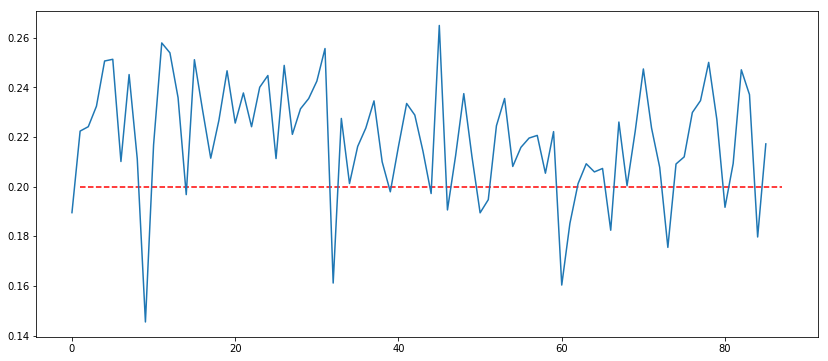

In [68]:
import matplotlib.pyplot as plt
print(len(EAR))
print("blink count:", blink_counter)
plt.figure(figsize=(14,6))
plt.plot(EAR)
plt.hlines(EYE_AR_THRESH, 1, k, linestyles='--', colors='r')
plt.show()